<a href="https://colab.research.google.com/github/multimediary/portfolio-data-science/blob/main/Memprediksi_Kepuasan_Para_Pelanggan_Sebuah_Maskapai_Penerbangan_Menggunakan_Supervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Memprediksi Kepuasan Para Pelanggan Sebuah Maskapai Penerbangan Menggunakan Supervised Machine Learning**

Proposal : [Download](https://github.com/multimediary/portfolio-data-science/blob/main/file/01%20Proposal%20Memprediksi%20Kepuasan%20Para%20Pelanggan%20Sebuah%20Maskapai%20Penerbangan%20Menggunakan%20Supervised%20Machine%20Learning.pptx?raw=true)

Final Project : [Download](https://github.com/multimediary/portfolio-data-science/blob/main/file/02%20Final%20Project%20Memprediksi%20Kepuasan%20Para%20Pelanggan%20Sebuah%20Maskapai%20Penerbangan%20Menggunakan%20Supervised%20Machine%20Learning.pptx?raw=true)

# Import Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Library For code execution time
!pip install ipython-autotime
%load_ext autotime
# Library For Eli5 in Feature Importance
!pip install eli5

     |████████████████████████████████| 106 kB 4.3 MB/s 
time: 3.14 s (started: 2021-08-13 16:48:17 +00:00)


# Data Preparation

## Loading Dataset

In [ ]:
#Load Data From Git
data=pd.read_csv("https://github.com/multimediary/dataset/blob/master/Invistico_Airline.csv?raw=true")

NameError: ignored

## Data Understanding

In [ ]:
#See the first 5 data
data.head()

In [ ]:
#See the number of rows and number of columns of data
data.shape

In [ ]:
#Understanding each variable
data.info()

## Data Cleaning

In [ ]:
#Tidying up column names in better format
data.rename(columns = {'satisfaction':'Satisfaction',
                       'Customer Type':'Customer type',
                       'Type of Travel':'Type of travel',
                       'Flight Distance':'Flight distance',
                       'Departure/Arrival time convenient':'Time convenience',
                       'Inflight wifi service':'Inflight wifi',
                       'Ease of Online booking':'Ease of online booking',
                       'Leg room service':'Legroom service',
                       'Checkin service':'Check-in service',
                       'Departure Delay in Minutes':'Departure delay',
                       'Arrival Delay in Minutes':'Arrival delay'}, 
            inplace = True)

In [ ]:
data.head()

In [ ]:
#Checking duplicates
data=data.drop_duplicates()

In [ ]:
#checking nulls
data.isna().sum()

In [ ]:
#Since the means of delay values aren't really different, it's wise to fill na with departure delay
data['Arrival delay'] = data['Arrival delay'].fillna(data['Departure delay'])

In [ ]:
data.head()

In [ ]:
#Changing Arrival Delay in Minutes's format to int
data['Arrival delay'] = data['Arrival delay'].astype(int)

In [ ]:
data.head()

### Imputing 0 with NaN for ordinal data

In [ ]:
for column in data.iloc[:, 7:-2].columns:
    data[column].replace(0, np.nan, inplace=True)

#replacing 0 with NaN to make it easier for us to see the nulls

In [ ]:
data.isna().sum()

#since the nulls are found in ordinal data not categorical, we use median instead of mode

In [ ]:
data.head(3)

### Imputing NaN with Mode for ordinal data

In [ ]:
for column in data.iloc[:, 7:-2].columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [ ]:
data.head()

In [ ]:
data.iloc[:, 7:-2] = data.iloc[:, 7:-2].astype(int)

In [ ]:
data.head(3)

## Data Encoding

In [ ]:
data.head(2)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
data_encode = data.copy()

In [ ]:
lE = LabelEncoder()
data_encode['Satisfaction'] = lE.fit_transform(data_encode['Satisfaction'])     #0 = dissatisfied, 1 = satisfied
data_encode['Gender'] = lE.fit_transform(data_encode['Gender'])                 #0 = female, 1 = male
data_encode['Customer type'] = lE.fit_transform(data_encode['Customer type'])   #0 = loyal, 1 = disloyal
data_encode['Type of travel'] = lE.fit_transform(data_encode['Type of travel']) #0 = business travel, 1 = personal travel
data_encode.replace(to_replace ="Eco", value = 0, inplace=True)
data_encode.replace(to_replace ="Eco Plus", value = 1, inplace=True)
data_encode.replace(to_replace ="Business", value = 2, inplace=True)

In [ ]:
data_encode.head()

In [ ]:
#Assigning numerical values and storing in another column for Class (test)
data_encode['Class_LE'] = lE.fit_transform(data_encode['Class'])
data_encode.head()

In [ ]:
set(data_encode['Class_LE'])

In [ ]:
#If we use LE to encode "Class", the result wouldn't be what we want because the values in column "Class" are actually ordinal where:
#Eco < Eco Plus < Business = 0 < 1 < 2
#LE results to 0 = Business, 1 = Eco, 2 = Eco Plus (in alphabetical order)
#Therefore we need to manually encode the feature "Class"

In [ ]:
data_encode.replace(to_replace ="Eco", value = 0, inplace=True)
data_encode.replace(to_replace ="Eco Plus", value = 1, inplace=True)
data_encode.replace(to_replace ="Business", value = 2, inplace=True)

In [ ]:
data_encode.drop(columns=['Class_LE'], inplace=True)

In [ ]:
#Freshly encoded data
data_encode.head()

# EDA #1: Are the "satisfied" and "dissatisfied" responses balanced?

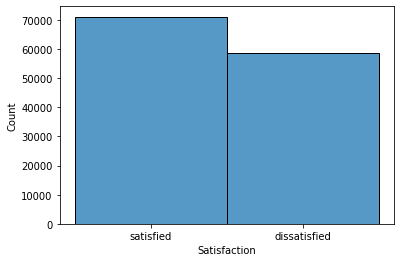

time: 282 ms (started: 2021-08-12 18:59:51 +00:00)


In [ ]:
sns.histplot(data=data, x="Satisfaction")

In [ ]:
satisfied_percent = len(data[data['Satisfaction'] == 'satisfied']) / len(data) * 100
satisfied_percent

54.73283030489683

time: 41.7 ms (started: 2021-08-12 18:59:51 +00:00)


In [ ]:
dissatisfied_percent = 100 - satisfied_percent
dissatisfied_percent

45.26716969510317

time: 12.5 ms (started: 2021-08-12 18:59:51 +00:00)


In [ ]:
print(f"Satisfied = {len(data[data['Satisfaction'] == 'satisfied'])}")

print(f"Dissatified = {len(data[data['Satisfaction'] == 'dissatisfied'])}")

Satisfied = 71087
Dissatified = 58793
time: 48.8 ms (started: 2021-08-12 18:59:51 +00:00)


#EDA 2: Correlation Heatmap & Feature Selection

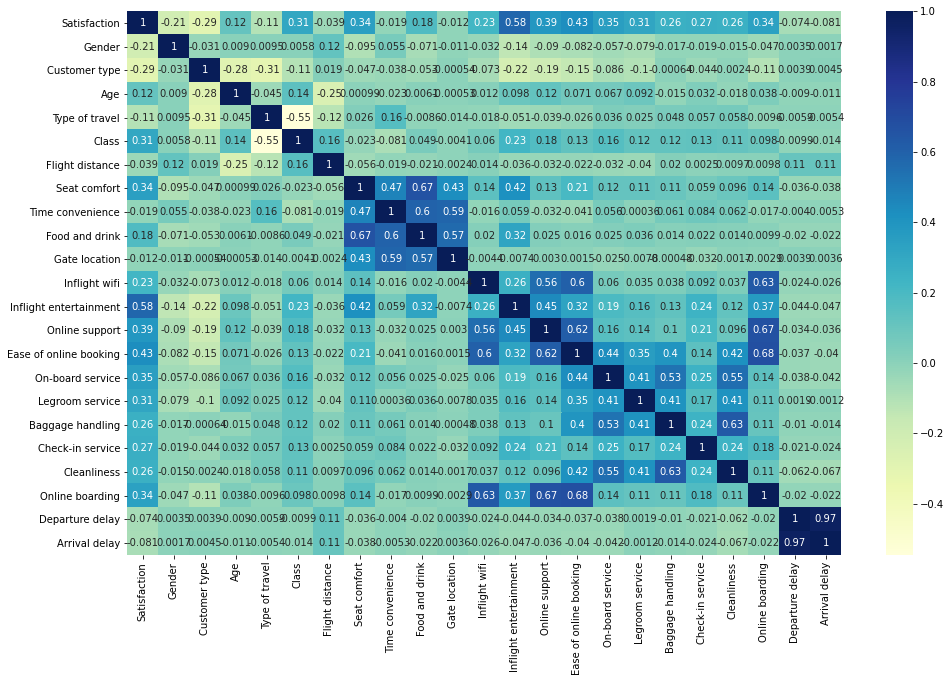

time: 3.26 s (started: 2021-08-12 18:59:51 +00:00)


In [ ]:
plt.figure(figsize = (16, 10))
sns.heatmap(data_encode.corr(), annot = True, cmap="YlGnBu")

If we see the data closely, we can actually "cluster" all but satisfaction columns into two groups:

A. Columns that explain the passengers: From column "Gender" to "Flight distance"
B. Columns that explain the airline's service: From column "Seat comfort" down to "Arrival delay"

## Cluster A: Explaining the Passengers

In [ ]:
data_A = data_encode.iloc[:, :7]
data_A

,Satisfaction,Gender,Customer type,Age,Type of travel,Class,Flight distance
0,1,0,0,65,1,0,265
1,1,1,0,47,1,2,2464
2,1,0,0,15,1,0,2138
3,1,0,0,60,1,0,623
4,1,0,0,70,1,0,354
...,...,...,...,...,...,...,...
129875,1,0,1,29,1,0,1731
129876,0,1,1,63,1,2,2087
129877,0,1,1,69,1,0,2320
129878,0,1,1,66,1,0,2450


time: 47.3 ms (started: 2021-08-12 18:59:54 +00:00)


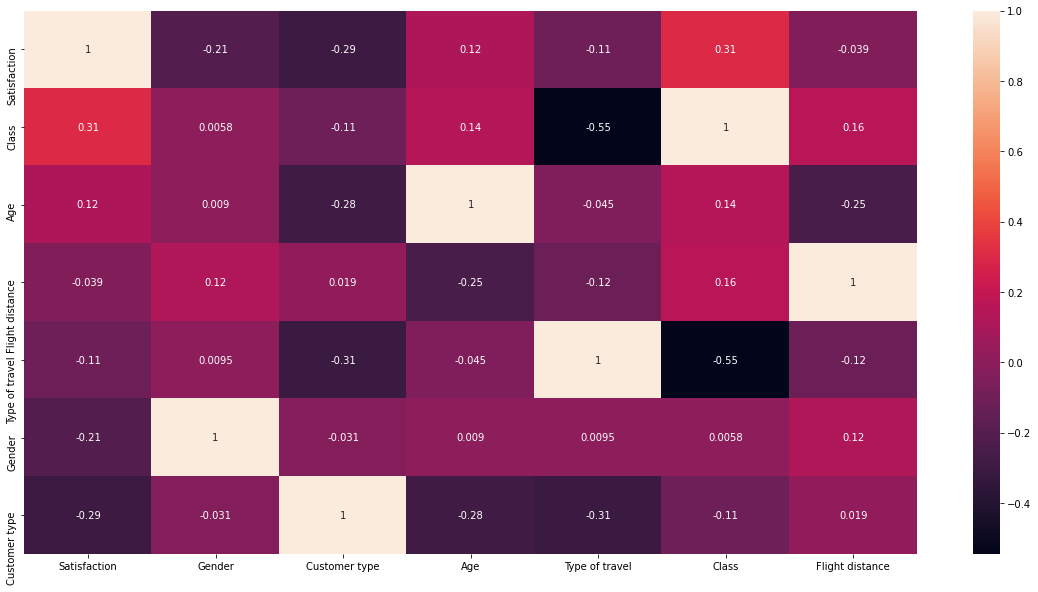

time: 593 ms (started: 2021-08-12 18:59:54 +00:00)


In [ ]:
plt.figure(figsize = (20, 10))
sns.heatmap(data_A.corr().sort_values('Satisfaction', ascending=False), annot = True)

From the sorted heatmap chart above, we can see that the top Class and Age correlates positively with satisfaction, while Customer type, Gender, and Type of Travel correlates negatively. With an arbitrary cut-off of +/- 0.1, I think Flight distance feature is negligible

In [ ]:
data_A

,Satisfaction,Gender,Customer type,Age,Type of travel,Class,Flight distance
0,1,0,0,65,1,0,265
1,1,1,0,47,1,2,2464
2,1,0,0,15,1,0,2138
3,1,0,0,60,1,0,623
4,1,0,0,70,1,0,354
...,...,...,...,...,...,...,...
129875,1,0,1,29,1,0,1731
129876,0,1,1,63,1,2,2087
129877,0,1,1,69,1,0,2320
129878,0,1,1,66,1,0,2450


time: 30.4 ms (started: 2021-08-12 18:59:55 +00:00)


In [ ]:
x_A = data_A.iloc[:, 1:] #ngambil semua kolom kecuali kolom paling kiri (Satisfaction)
y_A = data_A.iloc[:, :1] #ngambil kolom paling kiri yaitu Satisfaction

y_A

,Satisfaction
0,1
1,1
2,1
3,1
4,1
...,...
129875,1
129876,0
129877,0
129878,0


time: 17.2 ms (started: 2021-08-12 18:59:55 +00:00)


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

best_features = SelectKBest(score_func=chi2, k=6)
#choosing the best, K= the number of features we want to see the best
#the best based on what? that's the use of score_func

fit = best_features.fit(x_A,y_A)
#the algorithm "SelectKBest" will calculate chi2 from x to y, and will select the best 10

#How to see the scores?
#(fit.scores_)

data_score = pd.DataFrame(fit.scores_)
#putting the scores into DataFrame

data_column = pd.DataFrame(x_A.columns)

featurescore = pd.concat([data_column, data_score], axis=1)
featurescore.columns = ['Feature', 'Score']
featurescore.sort_values('Score', ascending = False)

,Feature,Score
5,Flight distance,106393.364973
4,Class,10911.753420
2,Age,10479.848971
1,Customer type,9083.244789
0,Gender,2968.361917
3,Type of travel,1070.315608


time: 261 ms (started: 2021-08-12 18:59:55 +00:00)


Contrary to correlation map above, flight distance actually scores the highest in feature selection, while type of travel scores the lowest. **The question now is: Should we remove flight distance from our list of features for modeling?**

## Cluster B: Explaining the service

In [ ]:
data_B = data_encode.drop(data_encode.iloc[:, 1:7], axis = 1)
data_B

,Satisfaction,Seat comfort,Time convenience,Food and drink,Gate location,Inflight wifi,Inflight entertainment,Online support,Ease of online booking,On-board service,Legroom service,Baggage handling,Check-in service,Cleanliness,Online boarding,Departure delay,Arrival delay
0,1,3,4,3,2,2,4,2,3,3,4,3,5,3,2,0,0
1,1,3,4,3,3,4,2,2,3,4,4,4,2,3,2,310,305
2,1,3,4,3,3,2,4,2,2,3,3,4,4,4,2,0,0
3,1,3,4,3,3,3,4,3,1,1,4,1,4,1,3,0,0
4,1,3,4,3,3,4,3,4,2,2,4,2,4,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0
129876,0,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,172
129877,0,3,4,3,3,3,2,2,4,4,3,4,2,3,2,155,163
129878,0,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205


time: 45 ms (started: 2021-08-12 18:59:55 +00:00)


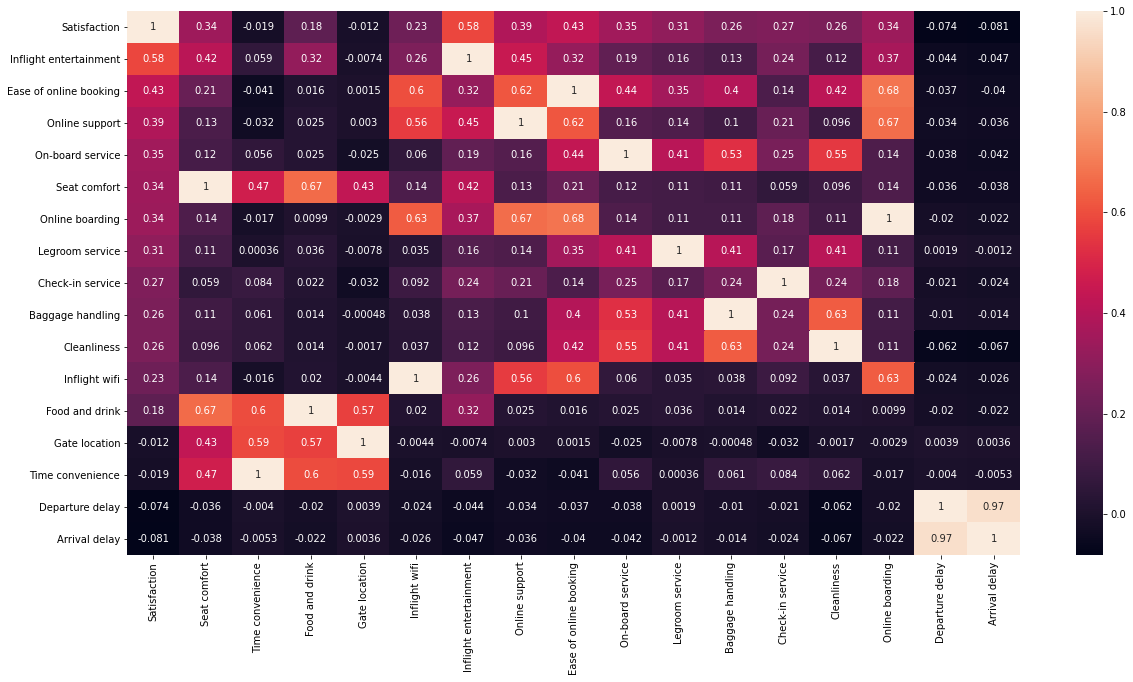

time: 1.76 s (started: 2021-08-12 18:59:55 +00:00)


In [ ]:
plt.figure(figsize = (20, 10))
sns.heatmap(data_B.corr().sort_values('Satisfaction', ascending=False), annot = True)

From the data above sorted heatmap above, we can see that all we can exclude the bottom 4 as their correlation value is below 0.1 (Gate location, time convenience, departure delay, arrival delay)

In [ ]:
x_B = data_B.iloc[:, 1:] #ngambil semua kolom kecuali kolom paling kiri (Satisfaction)
y_B = data_B.iloc[:, :1] #ngambil kolom paling kiri yaitu Satisfaction

x_B

,Seat comfort,Time convenience,Food and drink,Gate location,Inflight wifi,Inflight entertainment,Online support,Ease of online booking,On-board service,Legroom service,Baggage handling,Check-in service,Cleanliness,Online boarding,Departure delay,Arrival delay
0,3,4,3,2,2,4,2,3,3,4,3,5,3,2,0,0
1,3,4,3,3,4,2,2,3,4,4,4,2,3,2,310,305
2,3,4,3,3,2,4,2,2,3,3,4,4,4,2,0,0
3,3,4,3,3,3,4,3,1,1,4,1,4,1,3,0,0
4,3,4,3,3,4,3,4,2,2,4,2,4,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0
129876,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,172
129877,3,4,3,3,3,2,2,4,4,3,4,2,3,2,155,163
129878,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205


time: 48 ms (started: 2021-08-12 18:59:57 +00:00)


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

best_features = SelectKBest(score_func=chi2, k=16)
#choosing the best, K= the number of features we want to see the best
#the best based on what? that's the use of score_func

fit = best_features.fit(x_B,y_B)
#the algorithm "SelectKBest" will calculate chi2 from x to y, and will select the best 10

#How to see the scores?
#(fit.scores_)

data_score = pd.DataFrame(fit.scores_)
#putting the scores into DataFrame

data_column = pd.DataFrame(x_B.columns)

featurescore = pd.concat([data_column, data_score], axis=1)
featurescore.columns = ['Feature', 'Score']
featurescore.sort_values('Score', ascending = False)

,Feature,Score
15,Arrival delay,82923.703772
14,Departure delay,69888.597859
5,Inflight entertainment,19668.653107
7,Ease of online booking,11858.783355
6,Online support,9586.187161
0,Seat comfort,8445.692275
8,On-board service,7496.487052
13,Online boarding,7454.232520
9,Legroom service,5878.643838
11,Check-in service,4376.077654


time: 86.2 ms (started: 2021-08-12 18:59:57 +00:00)


While time convenience and gate location results are similar to correlation heatmap, both arrival and departure delays actually score the highest in feature selection for cluster B. The question now is: **Should we remove the delays from our list of features for modeling?**

# EDA #3: Seeing each feature more closely

## 3A: How do the features about passengers look like?

[Text(0, 0.5, ''), Text(0.5, 0, 'Flight distance')]

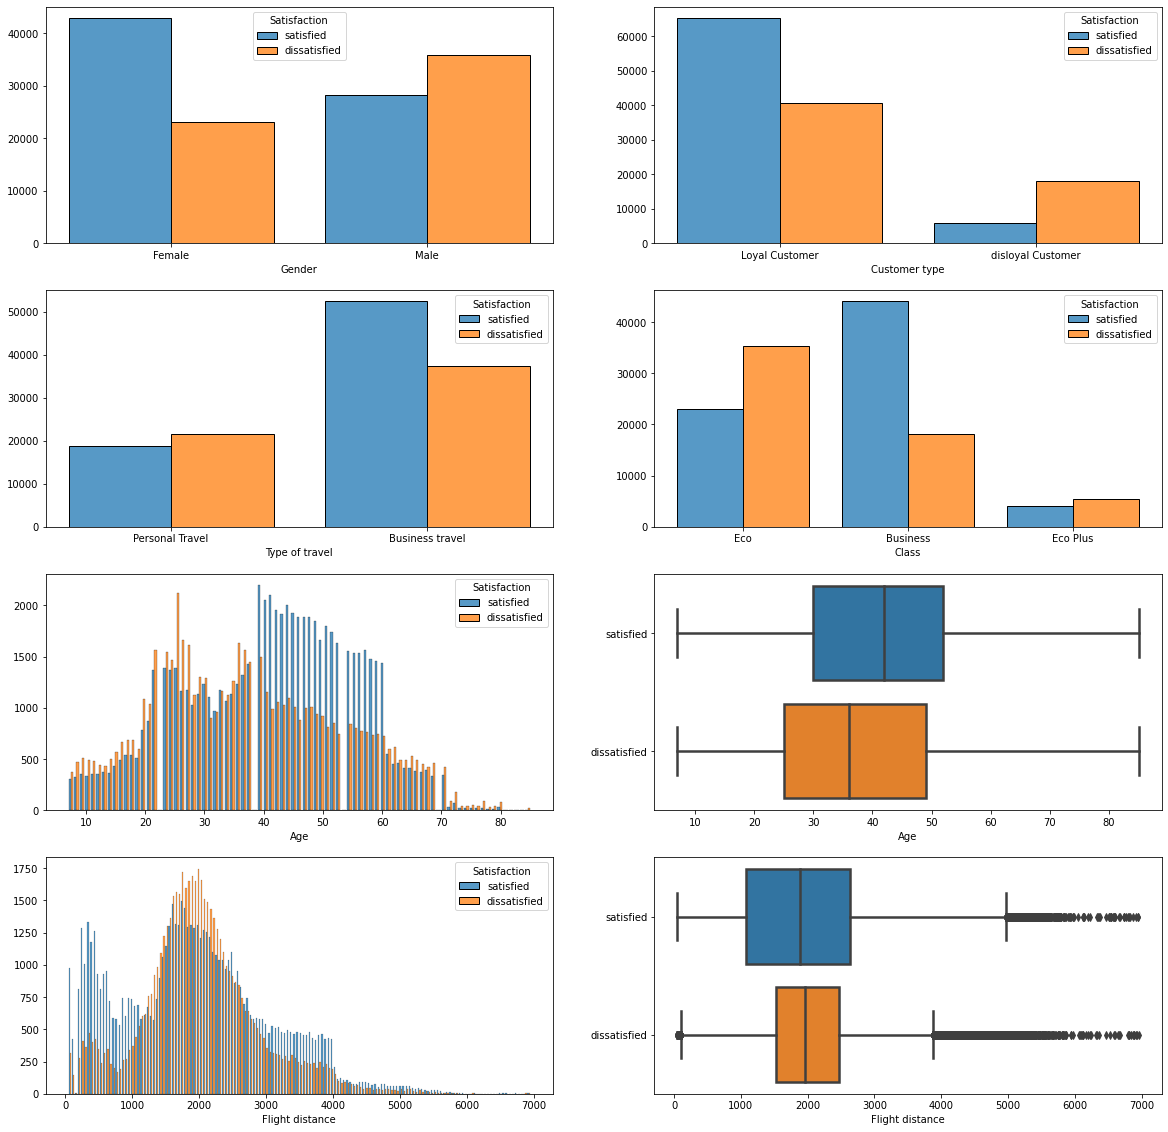

time: 4.17 s (started: 2021-08-12 18:59:57 +00:00)


In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(20, 20))

plt1 = sns.histplot(data=data, x="Gender", hue="Satisfaction", multiple="dodge", shrink=.8, ax = axs[0,0])
plt1.set(xlabel = 'Gender', ylabel= '')

plt1 = sns.histplot(data=data, x="Customer type", hue="Satisfaction", multiple="dodge", shrink=.8, ax = axs[0,1])
plt1.set(xlabel = 'Customer type', ylabel= '')

plt1 = sns.histplot(data=data, x="Type of travel", hue="Satisfaction", multiple="dodge", shrink=.8, ax = axs[1,0])
plt1.set(xlabel = 'Type of travel', ylabel= '')

plt1 = sns.histplot(data=data, x="Class", hue="Satisfaction", multiple="dodge", shrink=.8, ax = axs[1,1])
plt1.set(xlabel = 'Class', ylabel= '')

plt1 = sns.histplot(data=data, x="Age", hue="Satisfaction", multiple="dodge", shrink=.8, ax = axs[2,0])
plt1.set(xlabel = 'Age', ylabel= '')

plt1 = sns.boxplot(x="Age", y="Satisfaction", data=data, linewidth=2.5, ax = axs[2,1])
plt1.set(xlabel = 'Age', ylabel= '')

plt1 = sns.histplot(data=data, x="Flight distance", hue="Satisfaction", multiple="dodge", shrink=.8, ax = axs[3,0])
plt1.set(xlabel = 'Flight distance', ylabel= '')

plt1 = sns.boxplot(x="Flight distance", y="Satisfaction", data=data, linewidth=2.5, ax = axs[3,1])
plt1.set(xlabel = 'Flight distance', ylabel= '')

## 3B: How do the features about the service look like?

[Text(0, 0.5, ''), Text(0.5, 0, 'Departure delay')]

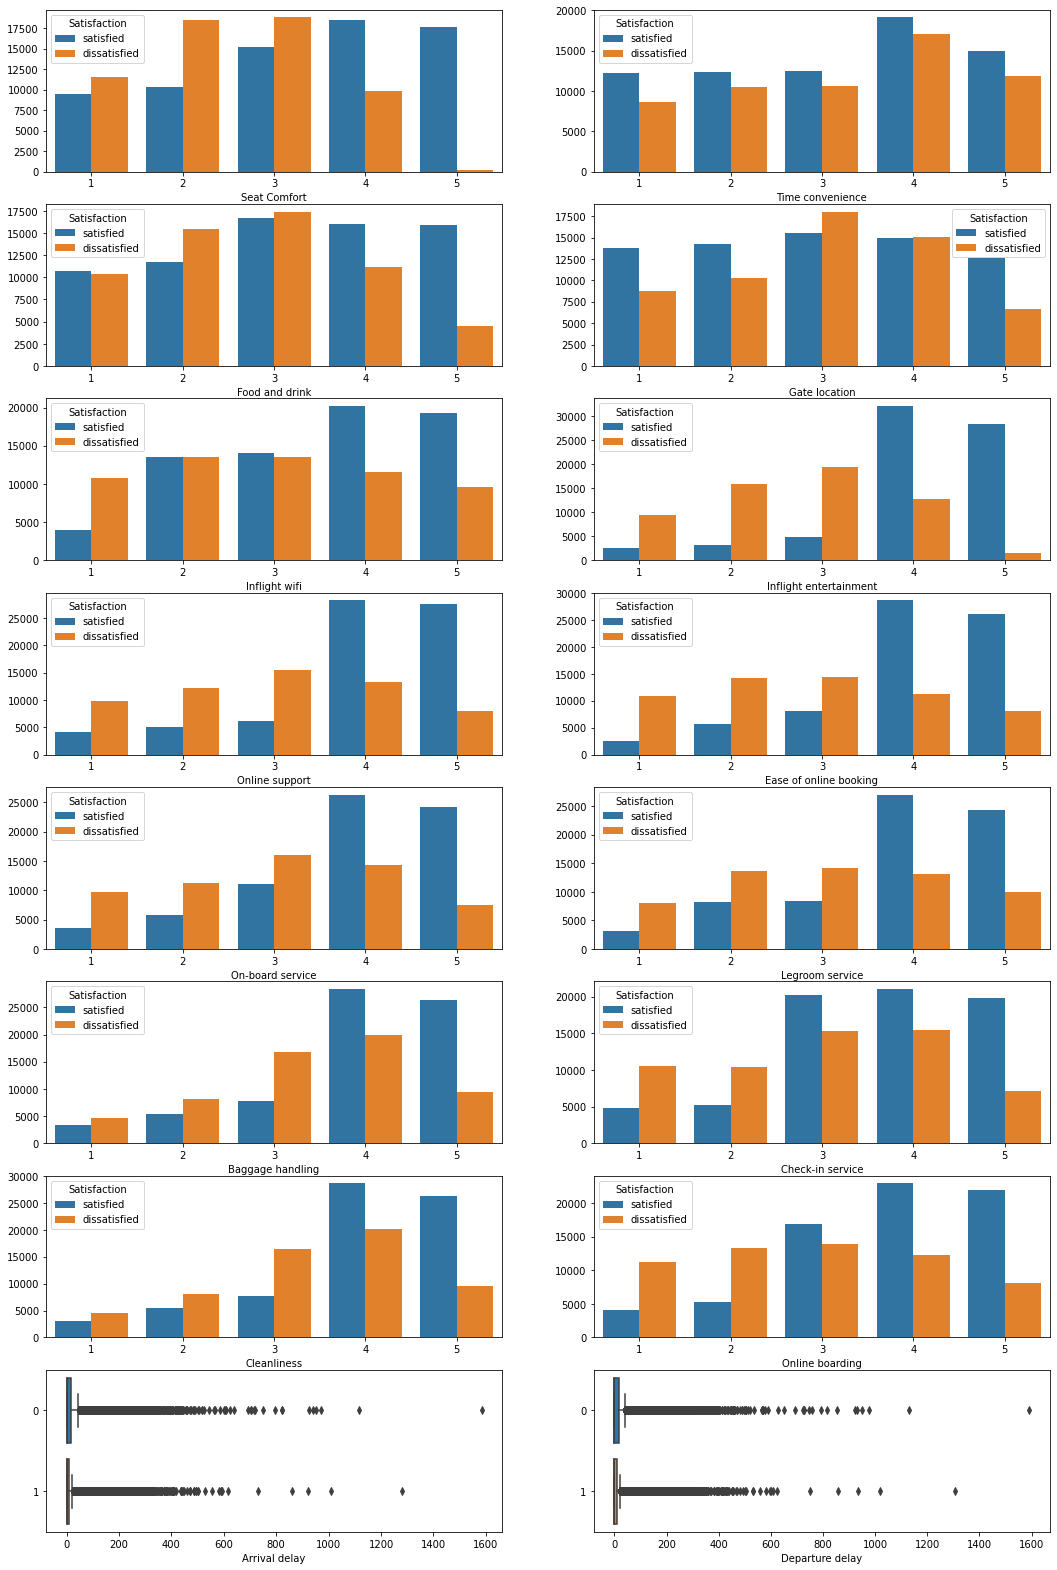

time: 4.07 s (started: 2021-08-12 19:00:02 +00:00)


In [ ]:
fig, axs = plt.subplots(8, 2, figsize=(18, 28))

plt1 = sns.countplot(data=data, x="Seat comfort", hue="Satisfaction", ax = axs[0,0])
plt1.set(xlabel = 'Seat Comfort', ylabel= '')

plt1 = sns.countplot(data=data, x="Time convenience", hue="Satisfaction", ax = axs[0,1])
plt1.set(xlabel = 'Time convenience', ylabel= '')

plt1 = sns.countplot(data=data, x="Food and drink", hue="Satisfaction", ax = axs[1,0])
plt1.set(xlabel = 'Food and drink', ylabel= '')

plt1 = sns.countplot(data=data, x="Gate location", hue="Satisfaction", ax = axs[1,1])
plt1.set(xlabel = 'Gate location', ylabel= '')

plt1 = sns.countplot(data=data, x="Inflight wifi", hue="Satisfaction", ax = axs[2,0])
plt1.set(xlabel = 'Inflight wifi', ylabel= '')

plt1 = sns.countplot(data=data, x="Inflight entertainment", hue="Satisfaction", ax = axs[2,1])
plt1.set(xlabel = 'Inflight entertainment', ylabel= '')

plt1 = sns.countplot(data=data, x="Online support", hue="Satisfaction", ax = axs[3,0])
plt1.set(xlabel = 'Online support', ylabel= '')

plt1 = sns.countplot(data=data, x="Ease of online booking", hue="Satisfaction", ax = axs[3,1])
plt1.set(xlabel = 'Ease of online booking', ylabel= '')

plt1 = sns.countplot(data=data, x="On-board service", hue="Satisfaction", ax = axs[4,0])
plt1.set(xlabel = 'On-board service', ylabel= '')

plt1 = sns.countplot(data=data, x="Legroom service", hue="Satisfaction", ax = axs[4,1])
plt1.set(xlabel = 'Legroom service', ylabel= '')

plt1 = sns.countplot(data=data, x="Baggage handling", hue="Satisfaction", ax = axs[5,0])
plt1.set(xlabel = 'Baggage handling', ylabel= '')

plt1 = sns.countplot(data=data, x="Check-in service", hue="Satisfaction", ax = axs[5,1])
plt1.set(xlabel = 'Check-in service', ylabel= '')

plt1 = sns.countplot(data=data, x="Cleanliness", hue="Satisfaction", ax = axs[6,0])
plt1.set(xlabel = 'Cleanliness', ylabel= '')

plt1 = sns.countplot(data=data, x="Online boarding", hue="Satisfaction", ax = axs[6,1])
plt1.set(xlabel = 'Online boarding', ylabel= '')

plt1 = sns.boxplot(x=data_encode["Arrival delay"], y=data_encode["Satisfaction"], orient='h', ax = axs[7,0])
plt1.set(xlabel = 'Arrival delay', ylabel= '')

plt1 = sns.boxplot(x=data_encode["Departure delay"], y=data_encode["Satisfaction"], orient='h', ax = axs[7,1])
plt1.set(xlabel = 'Departure delay', ylabel= '')

### 3C: Non-true outliers

[Text(0, 0.5, ''), Text(0.5, 0, 'Flight distance')]

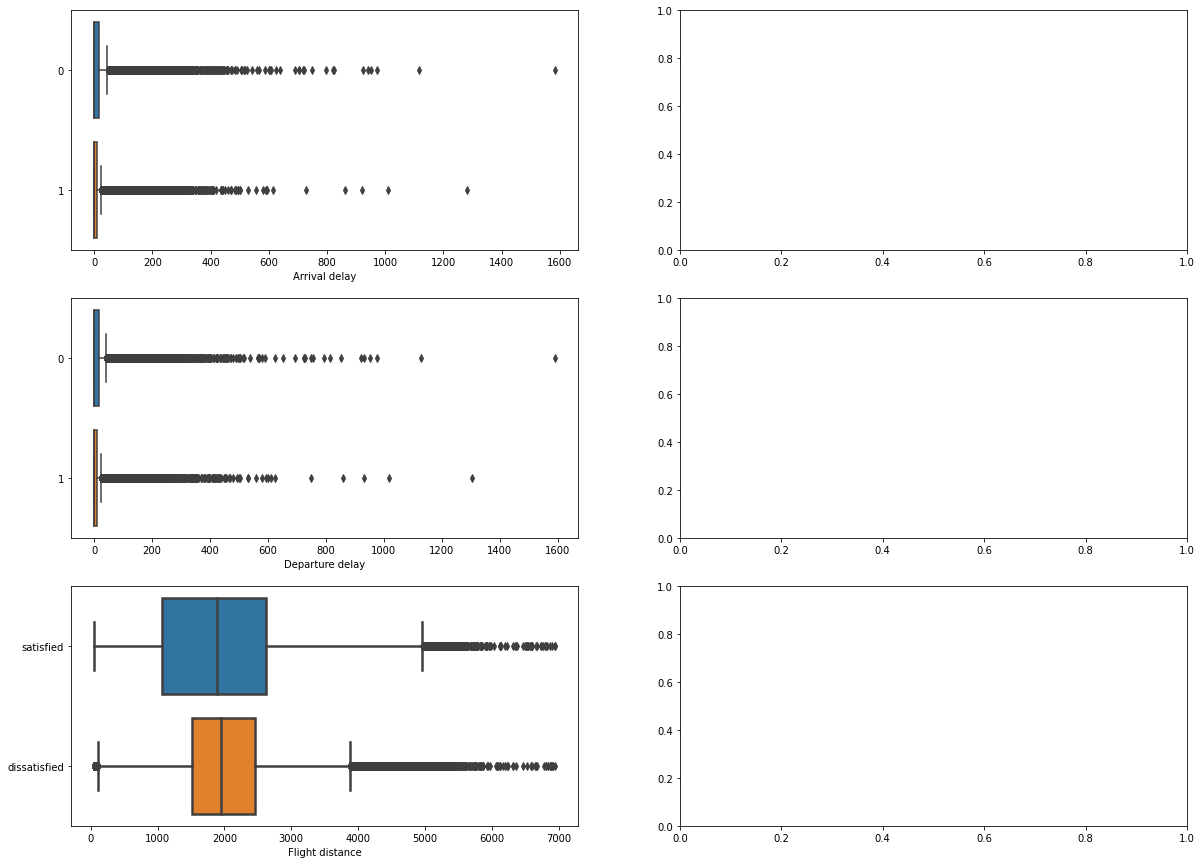

time: 1.18 s (started: 2021-08-13 08:27:02 +00:00)


In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(20,15))

plt1 = sns.boxplot(x=data_encode["Arrival delay"], y=data_encode["Satisfaction"], orient='h', ax = axs[0,0])
plt1.set(xlabel = 'Arrival delay', ylabel= '')

plt1 = sns.boxplot(x=data_encode["Departure delay"], y=data_encode["Satisfaction"], orient='h', ax = axs[1,0])
plt1.set(xlabel = 'Departure delay', ylabel= '')

plt1 = sns.boxplot(x="Flight distance", y="Satisfaction", data=data, linewidth=2.5, ax = axs[2,0])
plt1.set(xlabel = 'Flight distance', ylabel= '')

# Base Models

## Train-test split

In [ ]:
from sklearn.model_selection import train_test_split

time: 1.2 ms (started: 2021-08-13 16:48:44 +00:00)


In [ ]:
X = data_encode.drop(columns=['Satisfaction'])
y = data_encode['Satisfaction']

time: 9.6 ms (started: 2021-08-13 16:48:46 +00:00)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

time: 42.5 ms (started: 2021-08-13 16:48:46 +00:00)


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score

time: 1.98 ms (started: 2021-08-13 16:48:46 +00:00)


## RF & evaluation




In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)

time: 15.1 s (started: 2021-08-12 19:00:06 +00:00)


              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11675
           1       0.97      0.95      0.96     14301

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



0.9548068500323498

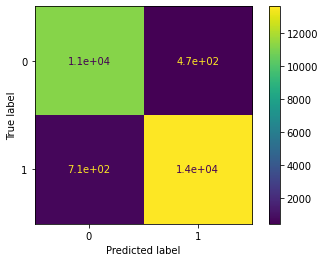

time: 905 ms (started: 2021-08-12 19:00:21 +00:00)


In [ ]:
print(classification_report(y_test, predict_rf))
plot_confusion_matrix(model_rf, X_test, y_test)
roc_auc_score(y_test, predict_rf)

## LR & evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()

model_lr.fit(X_train, y_train)
predict_lr = model_lr.predict(X_test)

time: 2.47 s (started: 2021-08-12 19:00:22 +00:00)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.81      0.72      0.76     11675
           1       0.79      0.87      0.83     14301

    accuracy                           0.80     25976
   macro avg       0.80      0.79      0.79     25976
weighted avg       0.80      0.80      0.80     25976



0.7906675878223577

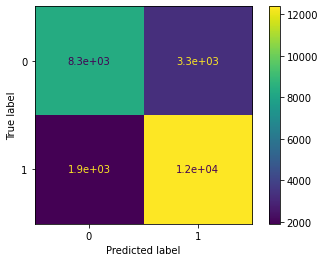

time: 370 ms (started: 2021-08-12 19:00:24 +00:00)


In [ ]:
print(classification_report(y_test, predict_lr))
plot_confusion_matrix(model_lr, X_test, y_test)
roc_auc_score(y_test, predict_lr)

## DT & evaluation

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()

model_dt.fit(X_train, y_train)
predict_dt = model_dt.predict(X_test)

time: 915 ms (started: 2021-08-13 16:48:52 +00:00)


              precision    recall  f1-score   support

           0       0.93      0.92      0.93     11675
           1       0.94      0.94      0.94     14301

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



0.9319834898714051

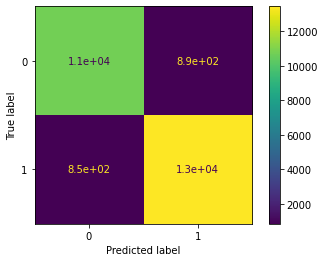

time: 333 ms (started: 2021-08-13 16:48:53 +00:00)


In [ ]:
print(classification_report(y_test, predict_dt))
plot_confusion_matrix(model_dt, X_test, y_test)
roc_auc_score(y_test, predict_dt)

# Feature Importance (example using RandomForest a.k.a rf)

## A. Feature Importance from RandomForestClassifier() source: machinelearningmastery.com

In [ ]:
from sklearn.ensemble import RandomForestClassifier

time: 1.27 ms (started: 2021-08-12 19:00:26 +00:00)


In [ ]:
model = RandomForestClassifier()

time: 1.26 ms (started: 2021-08-12 19:00:26 +00:00)


In [ ]:
#fit the model
model.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

time: 17 s (started: 2021-08-12 19:00:26 +00:00)


In [ ]:
#get importance
importance = model.feature_importances_.tolist()
feature = X.columns.tolist()

time: 40.6 ms (started: 2021-08-12 19:00:43 +00:00)


In [ ]:
feat_imp = pd.DataFrame(list(zip(feature, importance)),
                        columns =['Feature', 'Score'])
feat_imp.sort_values(by='Score', ascending=False).head(10)

,Feature,Score
11,Inflight entertainment,0.200322
6,Seat comfort,0.106505
12,Online support,0.075366
13,Ease of online booking,0.069513
1,Customer type,0.044350
14,On-board service,0.041330
4,Class,0.040662
15,Legroom service,0.040651
5,Flight distance,0.039097
2,Age,0.034443


time: 16.4 ms (started: 2021-08-12 19:00:43 +00:00)


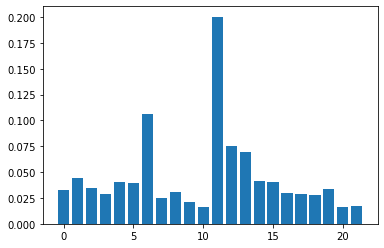

time: 186 ms (started: 2021-08-12 19:00:43 +00:00)


In [ ]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Feature Importance using Wrapper Method

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Customer type', 'Seat comfort', 'Inflight entertainment', 'Online support', 'Ease of online booking']
[0.03290807 0.04555192 0.03371714 0.03111439 0.03160918 0.03929753
 0.10627814 0.02446659 0.02861415 0.02139199 0.01771507 0.20670628
 0.06642875 0.07141542 0.04543303 0.04393134 0.0301393  0.02637585
 0.02790509 0.03623632 0.01560299 0.01716145]
time: 34.5 s (started: 2021-08-12 19:00:43 +00:00)


From this type of feature Importance, there are 5 features (Seat comfort, Inflight entertainment, Online support, Ease of online booking, On-board service) are inherently important in contributing to passenger satisfaction. However, we will come back to check with other feature importance methods.

## Feature Permutation Importance

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from eli5 import show_weights
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf(n_estimators=100, random_state=0).fit(X,y),random_state=1).fit(X,y)
show_weights(perm, feature_names = X.columns.tolist(), top=10)

Weight,Feature
0.1272 ± 0.0015,Seat comfort
0.0822 ± 0.0007,Inflight entertainment
0.0664 ± 0.0008,Customer type
0.0524 ± 0.0008,Gender
0.0334 ± 0.0004,Type of travel
0.0326 ± 0.0011,Check-in service
0.0310 ± 0.0005,Online support
0.0234 ± 0.0004,Baggage handling
0.0212 ± 0.0004,Cleanliness
0.0209 ± 0.0003,Online boarding


time: 4min 4s (started: 2021-08-12 19:01:18 +00:00)


If we take the top 5 from the results above we get (Seat comfort, Inflight entertainment, Customer type, Gender, Check-in service, Online spport, Type of travel, Baggage handling, Online boarding, Cleanliness) 

# Feature Importance (example using LogisticRegression)

## A. Feature Importance from LogisticRegression() source: machinelearningmastery.com

In [ ]:
from sklearn.linear_model import LogisticRegression

time: 1.27 ms (started: 2021-08-12 19:05:22 +00:00)


In [ ]:
modelLR = LogisticRegression()

time: 1.2 ms (started: 2021-08-12 19:05:22 +00:00)


In [ ]:
#fit the model
modelLR.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

time: 2.89 s (started: 2021-08-12 19:05:22 +00:00)


In [ ]:
#get importance
importanceLR = modelLR.coef_[0]
featureLR = X.columns.tolist()

time: 2.13 ms (started: 2021-08-12 19:05:25 +00:00)


In [ ]:
feat_impLR = pd.DataFrame(list(zip(featureLR, importanceLR)),
                        columns =['Feature', 'Score'])
feat_impLR.sort_values(by='Score', ascending=False).head(10)

,Feature,Score
11,Inflight entertainment,0.721301
4,Class,0.474449
6,Seat comfort,0.371538
13,Ease of online booking,0.248477
14,On-board service,0.191655
12,Online support,0.146386
15,Legroom service,0.119643
8,Food and drink,0.054793
17,Check-in service,0.049311
19,Online boarding,0.032969


time: 27.7 ms (started: 2021-08-12 19:05:25 +00:00)


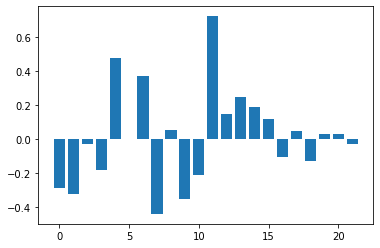

time: 192 ms (started: 2021-08-12 19:05:25 +00:00)


In [ ]:
# plot feature importance
plt.bar([x for x in range(len(importanceLR))], importanceLR)
plt.show()

## Feature Importance using Wrapper Method

In [ ]:
from sklearn.feature_selection import SelectFromModel

selectorLR = SelectFromModel(estimator=LogisticRegression()).fit(X, y)
supportLR = selectorLR.get_support()
featuresLR = X.loc[:,supportLR].columns.tolist()
print(featuresLR)
print(selectorLR.estimator_.coef_)

['Gender', 'Customer type', 'Class', 'Seat comfort', 'Time convenience', 'Gate location', 'Inflight wifi', 'Inflight entertainment', 'Ease of online booking']
[[-2.83445439e-01 -3.18190326e-01 -2.90953770e-02 -1.79584660e-01
   4.74448777e-01 -5.51449911e-04  3.71538199e-01 -4.37844915e-01
   5.47929052e-02 -3.48231601e-01 -2.09301216e-01  7.21300665e-01
   1.46386380e-01  2.48477313e-01  1.91655008e-01  1.19643176e-01
  -1.03747863e-01  4.93114613e-02 -1.27992739e-01  3.29689780e-02
   2.98143503e-02 -2.76833935e-02]]
time: 2.83 s (started: 2021-08-12 19:05:25 +00:00)


From this type of feature Importance, there are 9 features ('Gender', 'Customer type', 'Class', 'Seat comfort', 'Time convenience', 'Gate location', 'Inflight wifi', 'Inflight entertainment', 'Ease of online booking') are inherently important in contributing to passenger satisfaction. However, we will come back to check with other feature importance methods.

## Feature Permutation Importance




---



---



In [ ]:
import warnings
warnings.filterwarnings("ignore")

from eli5 import show_weights
from eli5.sklearn import PermutationImportance

permLR = PermutationImportance(modelLR.fit(X,y),random_state=1).fit(X,y)
show_weights(permLR, feature_names = X_train.columns.tolist(), top=10)

Weight,Feature
0.1196 ± 0.0009,Inflight entertainment
0.0515 ± 0.0005,Seat comfort
0.0436 ± 0.0002,Arrival delay
0.0304 ± 0.0009,Class
0.0243 ± 0.0007,Ease of online booking
0.0213 ± 0.0011,Departure delay
0.0146 ± 0.0003,On-board service
0.0132 ± 0.0004,Flight distance
0.0093 ± 0.0003,Customer type
0.0089 ± 0.0008,Online support


time: 7.97 s (started: 2021-08-12 19:05:28 +00:00)


If we take the top 10 from the results above we get (Inflight entertainment, Seat comfort, Class, Ease of online booking, On-board service, Time convenience, Customer type, Flight distacne, Legroom service, Online support) 

# Feature Importance (example using Decision Tree)






## A.Feature Importance from DecisionTreeClassifier() 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

time: 1.53 ms (started: 2021-08-12 19:05:36 +00:00)


In [ ]:
modelDT = DecisionTreeClassifier()

time: 1.35 ms (started: 2021-08-12 19:05:36 +00:00)


In [ ]:
#fit the model
modelDT.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

time: 1.06 s (started: 2021-08-12 19:05:36 +00:00)


In [ ]:
#get importance
importance = modelDT.feature_importances_.tolist()
feature = X.columns.tolist()

time: 2.82 ms (started: 2021-08-12 19:05:37 +00:00)


In [ ]:
feat_impDT = pd.DataFrame(list(zip(feature, importance)),
                        columns =['Feature', 'Score'])
feat_impDT.sort_values(by='Score', ascending=False).head(10)

,Feature,Score
11,Inflight entertainment,0.394027
6,Seat comfort,0.123543
13,Ease of online booking,0.063483
1,Customer type,0.048234
3,Type of travel,0.037581
5,Flight distance,0.034029
2,Age,0.030074
4,Class,0.029189
17,Check-in service,0.026106
7,Time convenience,0.023456


time: 25.5 ms (started: 2021-08-12 19:05:37 +00:00)


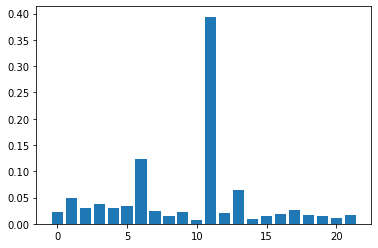

time: 196 ms (started: 2021-08-12 19:05:37 +00:00)


In [ ]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Feature Permutation using Wrapper Method (source: http://machinelearningandspark.blogspot.com/2016/06/feature-selection-in-decision-tree.html)



In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier

time: 1.8 ms (started: 2021-08-12 19:05:37 +00:00)


In [ ]:
selector = SelectFromModel(ExtraTreesClassifier())
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(selector.estimator_)

['Gender', 'Customer type', 'Class', 'Seat comfort', 'Inflight entertainment', 'Online support', 'Ease of online booking', 'On-board service']
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)
time: 12.6 s (started: 2021-08-12 19:05:37 +00:00)


From this type of feature importance, 7 features (Gender, Customer Type, Class, Seat Comfort, Inflight Entertainment, Online support, and Ease of Online book) are contributed to passenger satisfaction.

## Feature Permutation Importance




---



---


In [ ]:
import warnings
warnings.filterwarnings("ignore")

from eli5 import show_weights
from eli5.sklearn import PermutationImportance

permDT = PermutationImportance(modelDT.fit(X,y),random_state=1).fit(X,y)
show_weights(permDT, feature_names = X_train.columns.tolist(), top=5)

time: 5.91 s (started: 2021-08-12 19:05:50 +00:00)


# Modeling with Feature Selection & GridSearchCV (RF)

In [ ]:
X_fs = X.drop(columns=['Gate location', 'Time convenience', 'Flight distance', 'Arrival delay', 'Departure delay'])
y_fs = y.copy()
#dropping the 5 most insignificant according to heatmap correlation (feature selection) -- this is just example
#we will use the top 10 features from feature selection in X_fs later on

time: 9.85 ms (started: 2021-08-12 19:05:56 +00:00)


In [ ]:
X_fs_train, X_fs_test, y_fs_train, y_fs_test = train_test_split(X_fs, y_fs, test_size=0.2, random_state=42)

time: 45.8 ms (started: 2021-08-12 19:05:56 +00:00)


In [ ]:
from sklearn.model_selection import GridSearchCV
model_grid = RandomForestClassifier(random_state=42)

time: 2.2 ms (started: 2021-08-12 19:05:56 +00:00)


## Hyperparameter tuning: Grid search

In [ ]:
grid = {'criterion': ["gini", "entropy"],
        'max_depth': range(1, 10),
        'min_samples_leaf': range(2,10),
       }

search = GridSearchCV(estimator=model_grid, param_grid=grid, n_jobs=8, cv=2,
                      verbose=1, return_train_score=True)

search.fit(X_fs_train, y_fs_train)

search.best_estimator_

Fitting 2 folds for each of 144 candidates, totalling 288 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  7.7min
[Parallel(n_jobs=8)]: Done 288 out of 288 | elapsed: 13.0min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

time: 13min 9s (started: 2021-08-12 19:05:56 +00:00)


## Training fs model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf_fs= RandomForestClassifier(criterion='gini', max_depth=9, min_samples_leaf=3, min_samples_split=2, random_state=42)

model_rf_fs.fit(X_fs_train, y_fs_train)
predict_rf_fs = model_rf_fs.predict(X_fs_test)

time: 7.62 s (started: 2021-08-12 19:19:06 +00:00)


## Evaluation fs model

              precision    recall  f1-score   support

           0       0.92      0.90      0.91     11675
           1       0.92      0.94      0.93     14301

    accuracy                           0.92     25976
   macro avg       0.92      0.92      0.92     25976
weighted avg       0.92      0.92      0.92     25976



0.9161270404264866

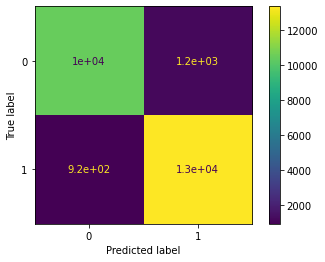

time: 616 ms (started: 2021-08-12 19:19:13 +00:00)


In [ ]:
print(classification_report(y_fs_test, predict_rf_fs))
plot_confusion_matrix(model_rf_fs, X_fs_test, y_fs_test)
roc_auc_score(y_fs_test, predict_rf_fs)

# Modeling with Feature Selection & GridSearchCV (LR)

In [ ]:
X_fs = X.drop(columns=['Gate location', 'Time convenience', 'Flight distance', 'Arrival delay', 'Departure delay'])
y_fs = y.copy()
#dropping the 5 most insignificant according to heatmap correlation (feature selection) -- this is just example
#we will use the top 10 features from feature selection in X_fs later on

time: 20 ms (started: 2021-08-12 19:19:14 +00:00)


In [ ]:
X_fs_train, X_fs_test, y_fs_train, y_fs_test = train_test_split(X_fs, y_fs, test_size=0.2, random_state=42)

time: 40.5 ms (started: 2021-08-12 19:19:14 +00:00)


In [ ]:
from sklearn.model_selection import GridSearchCV

time: 1.19 ms (started: 2021-08-12 19:19:14 +00:00)


## Hyperparameter tuning: Grid search

In [ ]:
gridlg = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,gridlg,cv=10)
logreg_cv.fit(X_fs_train,y_fs_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 2min 17s (started: 2021-08-12 19:19:14 +00:00)


In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.8447701799022976
time: 6.8 ms (started: 2021-08-12 19:21:32 +00:00)


In [ ]:
logreg2=LogisticRegression(C=10,penalty="l2")
logreg2.fit(X_fs_train,y_fs_train)
print("score",logreg2.score(X_fs_test,y_fs_test))

score 0.8421619956883277
time: 2.16 s (started: 2021-08-12 19:21:32 +00:00)


## Training fs model

In [ ]:
predict_lg_fs = logreg2.predict(X_fs_test)

time: 7.53 ms (started: 2021-08-12 19:21:34 +00:00)


## Evaluation fs model

              precision    recall  f1-score   support

           0       0.84      0.80      0.82     11675
           1       0.84      0.87      0.86     14301

    accuracy                           0.84     25976
   macro avg       0.84      0.84      0.84     25976
weighted avg       0.84      0.84      0.84     25976



0.8384797636978112

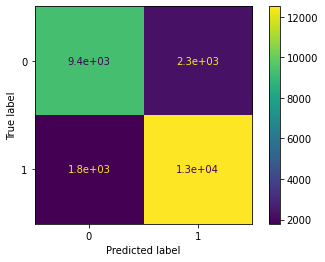

time: 358 ms (started: 2021-08-12 19:21:34 +00:00)


In [ ]:
print(classification_report(y_fs_test, predict_lg_fs))
plot_confusion_matrix(logreg2, X_fs_test, y_fs_test)
roc_auc_score(y_fs_test, predict_lg_fs)

#Modeling with Feature Selection & GridSearchCV (DT)

In [ ]:
X_fs = X.drop(columns=['Gate location', 'Time convenience', 'Flight distance', 'Arrival delay', 'Departure delay'])
y_fs = y.copy()
#dropping the 5 most insignificant according to heatmap correlation (feature selection) -- this is just example
#we will use the top 10 features from feature selection in X_fs later on

time: 9.3 ms (started: 2021-08-12 19:21:34 +00:00)


In [ ]:
X_fs_train, X_fs_test, y_fs_train, y_fs_test = train_test_split(X_fs, y_fs, test_size=0.2, random_state=42)

time: 34.5 ms (started: 2021-08-12 19:21:34 +00:00)


## Hyperparameter tuning: Grid search

In [ ]:
from sklearn import tree
model_dt= tree.DecisionTreeClassifier(random_state=42)

time: 2 ms (started: 2021-08-12 19:21:34 +00:00)


In [ ]:
grid = {'criterion': ["gini", "entropy"],
        'max_depth': range(1, 10),
        'min_samples_leaf': range(2,10),
        }

from sklearn.model_selection import GridSearchCV
search_dt = GridSearchCV (estimator=model_dt,
                         param_grid = grid,
                         n_jobs=9,
                         cv=2,
                         verbose=1,
                         return_train_score=True)

search_dt.fit(X_fs_train, y_fs_train)

search_dt.best_estimator_



Fitting 2 folds for each of 144 candidates, totalling 288 fits


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  46 tasks      | elapsed:    4.3s
[Parallel(n_jobs=9)]: Done 200 tasks      | elapsed:   22.9s
[Parallel(n_jobs=9)]: Done 288 out of 288 | elapsed:   35.5s finished


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

time: 36 s (started: 2021-08-12 19:21:34 +00:00)


## Training fs model

In [ ]:
model_dt_fs= DecisionTreeClassifier (criterion='gini', max_depth=9, min_samples_leaf=2, random_state=42)

model_dt_fs.fit(X_fs_train, y_fs_train)
predict_dt_fs = model_dt_fs.predict(X_fs_test)

time: 344 ms (started: 2021-08-12 19:22:10 +00:00)


## Evaluation fs model

              precision    recall  f1-score   support

           0       0.92      0.91      0.91     11675
           1       0.93      0.93      0.93     14301

    accuracy                           0.92     25976
   macro avg       0.92      0.92      0.92     25976
weighted avg       0.92      0.92      0.92     25976



0.9222800370199176

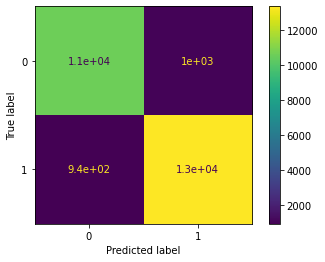

time: 298 ms (started: 2021-08-12 19:22:11 +00:00)


In [ ]:
print(classification_report(y_fs_test, predict_dt_fs))
plot_confusion_matrix(model_dt_fs, X_fs_test, y_fs_test)
roc_auc_score(y_fs_test, predict_dt_fs)

# Top 9 and Top 6 

## RF

In [ ]:
X_top9 = X[['Seat comfort', 'Inflight entertainment', 'Online support', 'Ease of online booking', 'Customer type',
            'Class','Gender', 'On-board service', 'Check-in service']]

X_top6 = X[['Seat comfort', 'Inflight entertainment', 'Online support', 'Ease of online booking', 'Customer type',
            'Class']]
y_fs = y.copy()

time: 14.6 ms (started: 2021-08-13 16:49:18 +00:00)


In [ ]:
X_top9_train, X_top9_test, y_fs_train, y_fs_test = train_test_split(X_top9, y_fs, test_size=0.2, random_state=42)

time: 38 ms (started: 2021-08-13 16:49:19 +00:00)


In [ ]:
X_top6_train, X_top6_test, y_fs_train, y_fs_test = train_test_split(X_top6, y_fs, test_size=0.2, random_state=42)

time: 26.4 ms (started: 2021-08-13 16:49:19 +00:00)


### Top 9

In [ ]:
from sklearn.model_selection import GridSearchCV

time: 1.18 ms (started: 2021-08-13 16:49:19 +00:00)


In [ ]:
grid = {'criterion': ["gini", "entropy"],
        'max_depth': range(1, 10),
        'min_samples_leaf': range(2,10),
       }

search = GridSearchCV(estimator=model_grid, param_grid=grid, n_jobs=8, cv=2,
                      verbose=1, return_train_score=True)

search.fit(X_top9_train, y_fs_train)

search.best_estimator_

NameError: ignored

time: 17.6 ms (started: 2021-08-13 16:49:19 +00:00)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf_fs= RandomForestClassifier(criterion='gini', max_depth=9, min_samples_leaf=2, min_samples_split=2, random_state=42)

model_rf_fs.fit(X_top9_train, y_fs_train)
predict_rf_fs = model_rf_fs.predict(X_top9_test)

In [ ]:
print(classification_report(y_fs_test, predict_rf_fs))
plot_confusion_matrix(model_rf_fs, X_top9_test, y_fs_test)
roc_auc_score(y_fs_test, predict_rf_fs)

In [ ]:
from sklearn.metrics import roc_curve

rf_fpr, rf_tpr, _ = roc_curve(y_test, predict_rf_fs)

# plot the roc curve for the model
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forests')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

### Top 6

In [ ]:
grid = {'criterion': ["gini", "entropy"],
        'max_depth': range(1, 10),
        'min_samples_leaf': range(2,10),
       }

search = GridSearchCV(estimator=model_grid, param_grid=grid, n_jobs=8, cv=2,
                      verbose=1, return_train_score=True)

search.fit(X_top6_train, y_fs_train)

search.best_estimator_

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf_fs= RandomForestClassifier(criterion='gini', max_depth=9, min_samples_leaf=2, min_samples_split=2, random_state=42)

model_rf_fs.fit(X_top6_train, y_fs_train)
predict_rf_fs = model_rf_fs.predict(X_top6_test)

In [ ]:
print(classification_report(y_fs_test, predict_rf_fs))
plot_confusion_matrix(model_rf_fs, X_top6_test, y_fs_test)
roc_auc_score(y_fs_test, predict_rf_fs)

### Gridsearch All Features

In [ ]:
from sklearn.model_selection import GridSearchCV
model_grid = RandomForestClassifier(random_state=42)

In [ ]:
grid = {'criterion': ["gini", "entropy"],
        'max_depth': range(1, 10),
        'min_samples_leaf': range(2,10),
       }

search = GridSearchCV(estimator=model_grid, param_grid=grid, n_jobs=8, cv=2,
                      verbose=1, return_train_score=True)

search.fit(X_train, y_train)

search.best_estimator_

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf_fs= RandomForestClassifier(criterion='gini', max_depth=9, min_samples_leaf=3, min_samples_split=2, random_state=42)

model_rf_fs.fit(X_train, y_train)
predict_rf_fs = model_rf_fs.predict(X_test)

In [ ]:
print(classification_report(y_test, predict_rf_fs))
plot_confusion_matrix(model_rf_fs, X_test, y_test)
roc_auc_score(y_test, predict_rf_fs)

## LR

 ### TOP 9

In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()

model_lr.fit(X_top9_train, y_fs_train)
predict_lr = model_lr.predict(X_top9_test)

In [ ]:
gridlg = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,gridlg,cv=10)
logreg_cv.fit(X_top9_train,y_fs_train)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

In [ ]:
logreg2=LogisticRegression(C=0.1,penalty="l2")
logreg2.fit(X_top9_train,y_fs_train)
print("score",logreg2.score(X_top9_test,y_fs_test))

In [ ]:
print(classification_report(y_fs_test, predict_lr))
plot_confusion_matrix(model_lr, X_top9_test, y_fs_test)
roc_auc_score(y_fs_test, predict_lr)

### TOP 6

In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()

model_lr.fit(X_top6_train, y_fs_train)
predict_lr = model_lr.predict(X_top6_test)

In [ ]:
gridlg = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,gridlg,cv=10)
logreg_cv.fit(X_top6_train,y_fs_train)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

In [ ]:
logreg2=LogisticRegression(C=0.01,penalty="l2")
logreg2.fit(X_top6_train,y_fs_train)
print("score",logreg2.score(X_top6_test,y_fs_test))

In [ ]:
print(classification_report(y_fs_test, predict_lr))
plot_confusion_matrix(model_lr, X_top6_test, y_fs_test)
roc_auc_score(y_fs_test, predict_lr)

### Gridsearch All Features

In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()

model_lr.fit(X_train, y_fs_train)
predict_lr = model_lr.predict(X_test)

In [ ]:
gridlg = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,gridlg,cv=10)
logreg_cv.fit(X_train,y_fs_train)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

In [ ]:
logreg2=LogisticRegression(C=10,penalty="l2")
logreg2.fit(X_train,y_fs_train)
print("score",logreg2.score(X_test,y_fs_test))

In [ ]:
print(classification_report(y_fs_test, predict_lr))
plot_confusion_matrix(model_lr, X_test, y_fs_test)
roc_auc_score(y_fs_test, predict_lr)

## DT

In [ ]:
X_top9 = pd.DataFrame(X, columns= ['Seat comfort', 'Inflight entertainment', 'Online support', 'Ease of online booking', 'Customer type',
            'Class','Gender', 'On-board service', 'Check-in service'])

X_top6 = pd.DataFrame(X, columns= ['Seat comfort', 'Inflight entertainment', 'Online support', 'Ease of online booking', 'Customer type',
            'Class'])
X_Full_DT = X.copy()
y_fs = y.copy()

time: 26.7 ms (started: 2021-08-13 16:50:00 +00:00)


In [ ]:
X_top9_train, X_top9_test, y_fs_train, y_fs_test = train_test_split(X_top9, y_fs, test_size=0.2, random_state=42)

time: 31.1 ms (started: 2021-08-13 16:50:00 +00:00)


In [ ]:
X_top6_train, X_top6_test, y_fs_train, y_fs_test = train_test_split(X_top6, y_fs, test_size=0.2, random_state=42)

time: 21.8 ms (started: 2021-08-13 16:50:00 +00:00)


In [ ]:
X_Full_train, X_Full_test, y_fs_train, y_fs_test = train_test_split(X_Full_DT, y_fs, test_size=0.2, random_state=42)

time: 40.6 ms (started: 2021-08-13 16:50:00 +00:00)


### Top 9

In [ ]:
grid = {'criterion': ["gini", "entropy"],
        'max_depth': range(1, 10),
        'min_samples_leaf': range(2,10),
        }

from sklearn.model_selection import GridSearchCV
search_dt = GridSearchCV (estimator=model_dt,
                         param_grid = grid,
                         n_jobs=9,
                         cv=2,
                         verbose=1,
                         return_train_score=True)

search_dt.fit(X_top9_train, y_fs_train)

search_dt.best_estimator_

Fitting 2 folds for each of 144 candidates, totalling 288 fits


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:    7.1s
[Parallel(n_jobs=9)]: Done 182 tasks      | elapsed:   18.9s
[Parallel(n_jobs=9)]: Done 288 out of 288 | elapsed:   27.6s finished


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

time: 27.8 s (started: 2021-08-13 16:50:00 +00:00)


In [ ]:
model_dt_fs= DecisionTreeClassifier (criterion='gini', max_depth=9, min_samples_leaf=2, random_state=42)

model_dt_fs.fit(X_top9_train, y_fs_train)
predict_dt_fs = model_dt_fs.predict(X_top9_test)

time: 161 ms (started: 2021-08-13 16:50:28 +00:00)


              precision    recall  f1-score   support

           0       0.90      0.89      0.89     11675
           1       0.91      0.92      0.91     14301

    accuracy                           0.90     25976
   macro avg       0.90      0.90      0.90     25976
weighted avg       0.90      0.90      0.90     25976



0.9014701656807517

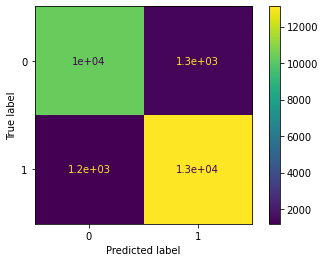

time: 277 ms (started: 2021-08-13 16:50:28 +00:00)


In [ ]:
print(classification_report(y_fs_test, predict_dt_fs))
plot_confusion_matrix(model_dt_fs, X_top9_test, y_fs_test)
roc_auc_score(y_fs_test, predict_dt_fs)

### TOP 6

In [ ]:
rid = {'criterion': ["gini", "entropy"],
        'max_depth': range(1, 10),
        'min_samples_leaf': range(2,10),
        }

from sklearn.model_selection import GridSearchCV
search_dt = GridSearchCV (estimator=model_dt,
                         param_grid = grid,
                         n_jobs=9,
                         cv=2,
                         verbose=1,
                         return_train_score=True)

search_dt.fit(X_top6_train, y_fs_train)

search_dt.best_estimator_

Fitting 2 folds for each of 144 candidates, totalling 288 fits


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  46 tasks      | elapsed:    2.5s
[Parallel(n_jobs=9)]: Done 236 tasks      | elapsed:   13.5s
[Parallel(n_jobs=9)]: Done 288 out of 288 | elapsed:   16.9s finished


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

time: 17.1 s (started: 2021-08-13 16:50:28 +00:00)


In [ ]:
model_dt_fs= DecisionTreeClassifier (criterion='gini', max_depth=9, min_samples_leaf=2, random_state=42)

model_dt_fs.fit(X_top6_train, y_fs_train)
predict_dt_fs = model_dt_fs.predict(X_top6_test)

time: 95.7 ms (started: 2021-08-13 16:50:46 +00:00)


              precision    recall  f1-score   support

           0       0.89      0.87      0.88     11675
           1       0.89      0.91      0.90     14301

    accuracy                           0.89     25976
   macro avg       0.89      0.89      0.89     25976
weighted avg       0.89      0.89      0.89     25976



0.8905886098020729

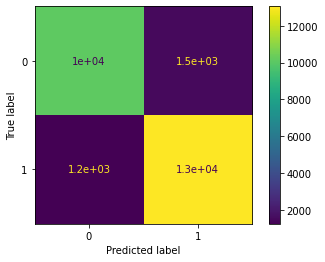

time: 276 ms (started: 2021-08-13 16:50:46 +00:00)


In [ ]:
print(classification_report(y_fs_test, predict_dt_fs))
plot_confusion_matrix(model_dt_fs, X_top6_test, y_fs_test)
roc_auc_score(y_fs_test, predict_dt_fs)

### Gridsearch All Features

In [ ]:
Grid = {'criterion': ["gini", "entropy"],
        'max_depth': range(1, 10),
        'min_samples_leaf': range(2,10),
        }

from sklearn.model_selection import GridSearchCV
search_dt = GridSearchCV (estimator=model_dt,
                         param_grid = grid,
                         n_jobs=9,
                         cv=2,
                         verbose=1,
                         return_train_score=True)

search_dt.fit(X_Full_train, y_fs_train)

search_dt.best_estimator_

Fitting 2 folds for each of 144 candidates, totalling 288 fits


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:    3.1s
[Parallel(n_jobs=9)]: Done 182 tasks      | elapsed:   28.4s
[Parallel(n_jobs=9)]: Done 288 out of 288 | elapsed:   49.7s finished


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

time: 50.4 s (started: 2021-08-13 16:50:46 +00:00)


In [ ]:
model_dt_fs= DecisionTreeClassifier (criterion='gini', max_depth=9, min_samples_leaf=6, random_state=42)

model_dt_fs.fit(X_Full_train, y_fs_train)
predict_dt_fs = model_dt_fs.predict(X_Full_test)

time: 590 ms (started: 2021-08-13 16:51:36 +00:00)


              precision    recall  f1-score   support

           0       0.93      0.91      0.92     11675
           1       0.93      0.94      0.94     14301

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



0.9267079599560805

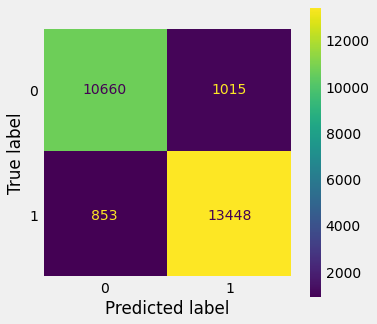

time: 288 ms (started: 2021-08-13 16:57:58 +00:00)


In [ ]:
fig, ax = plt.subplots(figsize = (5,5))
plt.grid(False)
print(classification_report(y_fs_test, predict_dt_fs))
plot_confusion_matrix(model_dt_fs, X_Full_test, y_fs_test, values_format = '', ax=ax)
roc_auc_score(y_fs_test, predict_dt_fs)

### ROC/AUC graph (For Best model only - DT gridsearch 22 feats)

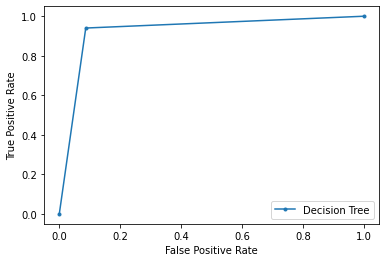

time: 234 ms (started: 2021-08-13 16:51:37 +00:00)


In [ ]:
from sklearn.metrics import roc_curve

dt_fpr, dt_tpr, _ = roc_curve(y_fs_test, predict_dt_fs)

# plot the roc curve for the model
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (10, 10)
#in general, the plotting that has angle closer to right angle is better
#Why?due to the fact that the "inflection point" reaches higher value of TPR